In [35]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
df=pd.read_csv('C:\\Users\\Armaan\\OneDrive\\Desktop\\SMSSPAM\\data.csv',encoding='unicode_escape')
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [37]:
df.shape

(435742, 13)

In [38]:
df.info

<bound method DataFrame.info of        stn_code       sampling_date                        state   location  \
0         150.0  February - M021990               Andhra Pradesh  Hyderabad   
1         151.0  February - M021990               Andhra Pradesh  Hyderabad   
2         152.0  February - M021990               Andhra Pradesh  Hyderabad   
3         150.0     March - M031990               Andhra Pradesh  Hyderabad   
4         151.0     March - M031990               Andhra Pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  West Bengal   ULUBERIA   
435738     SAMP            29-12-15                  West Bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  Lakshadweep        NaN   
435741      NaN                 NaN                      Tripura        NaN   

                   

In [39]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [40]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [41]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [42]:
df.columns


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

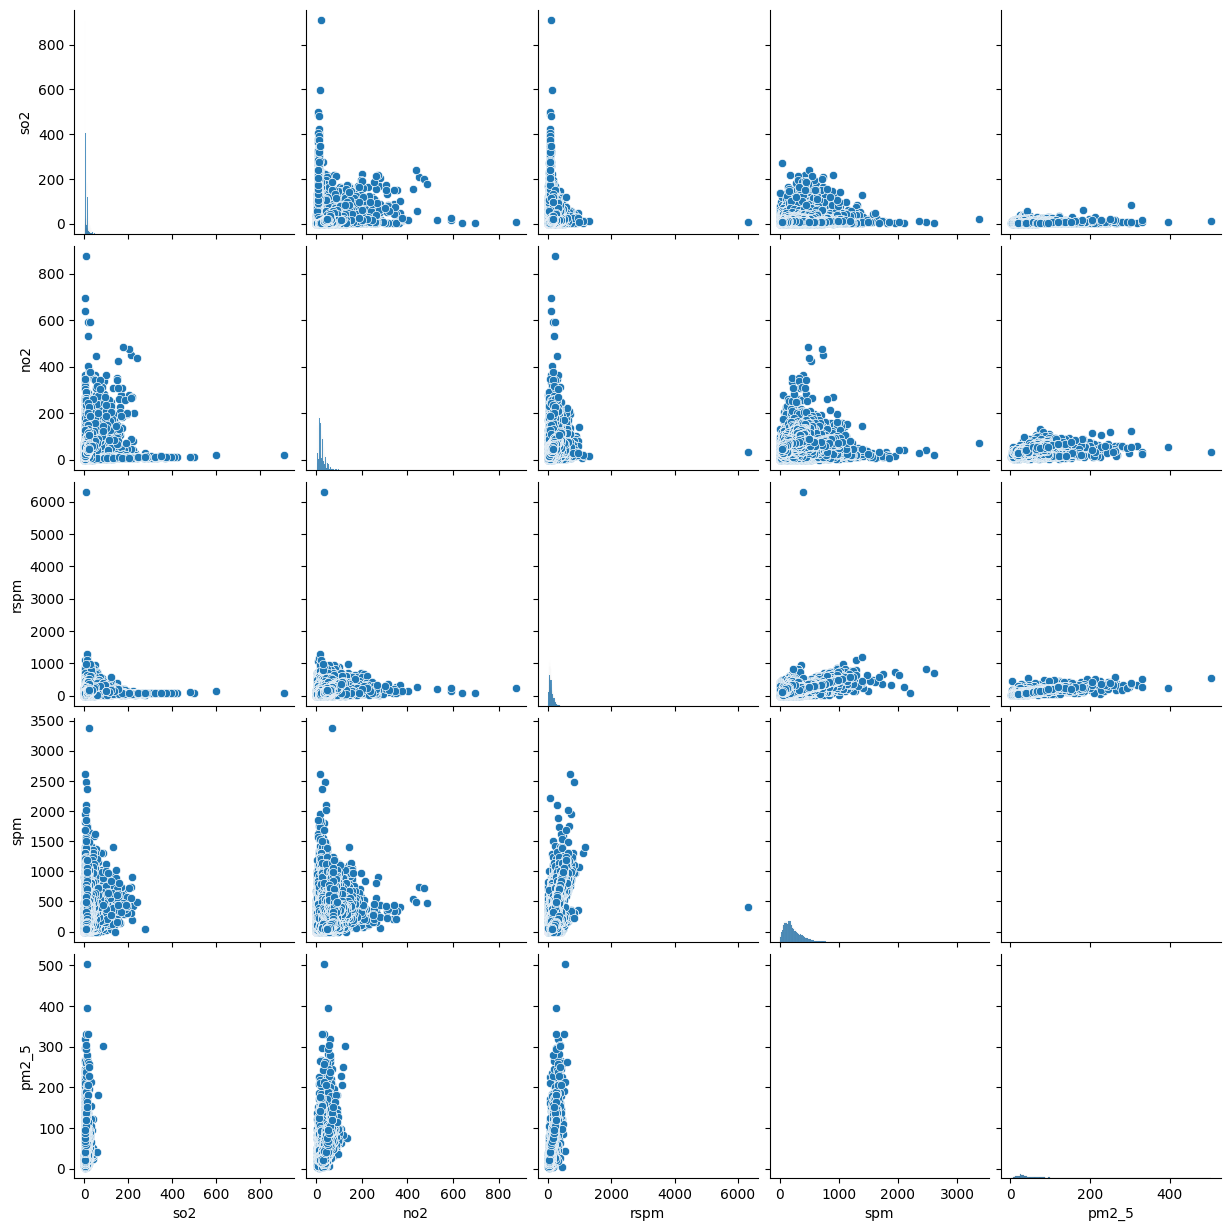

In [43]:
sns.pairplot(data=df)

In [44]:
df['state'].value_counts()

state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

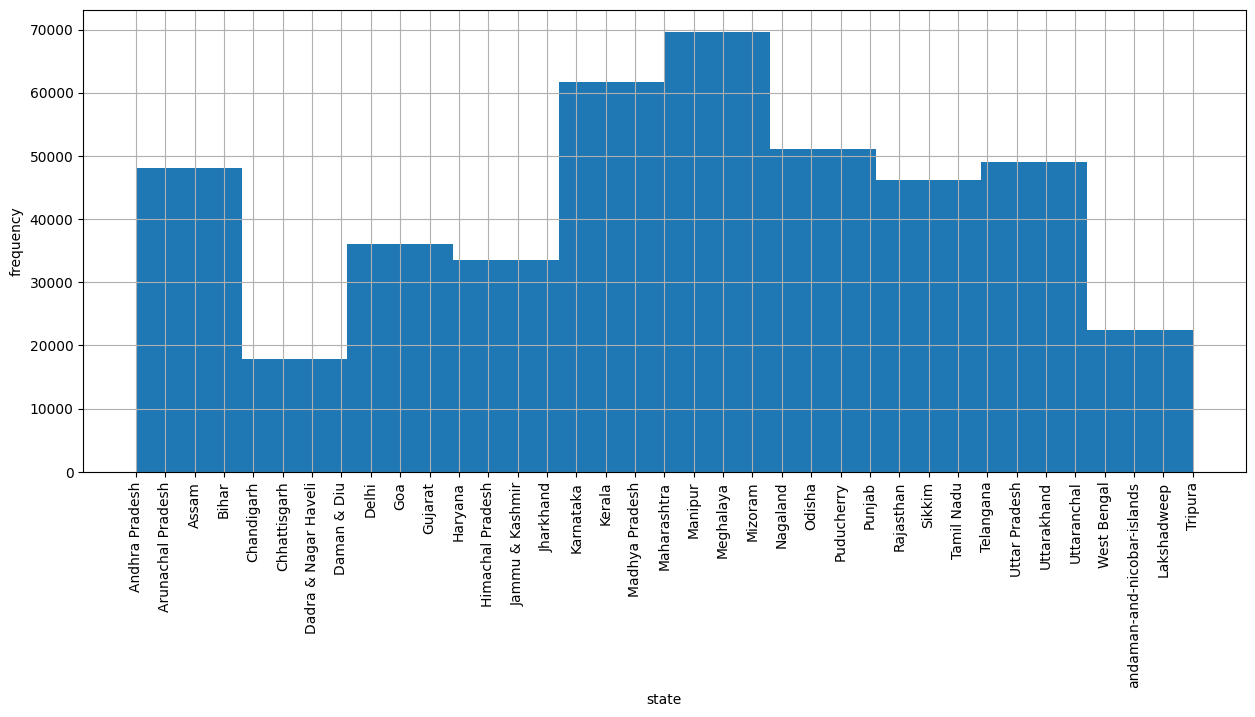

In [45]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('frequency')
plt.plot

In [46]:
df['type'].value_counts()

type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

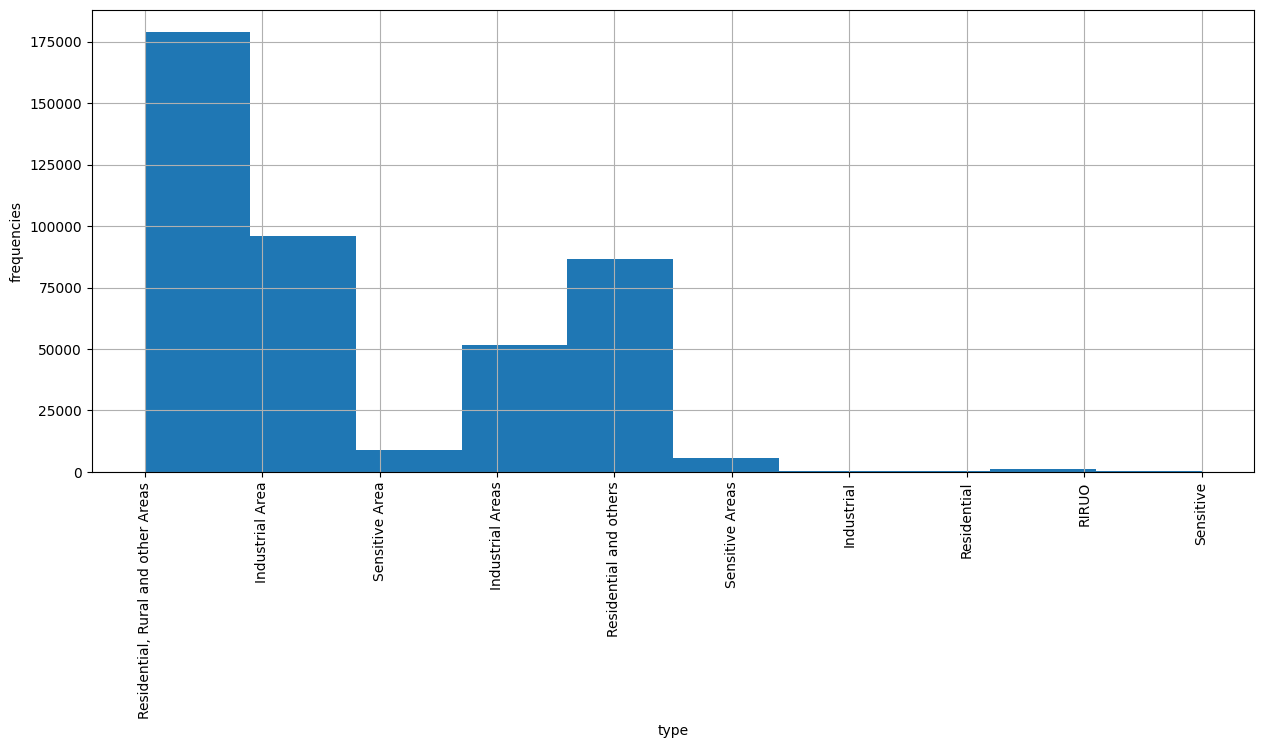

In [47]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('type')
plt.ylabel('frequencies')
plt.plot

In [48]:
df['agency'].value_counts()

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

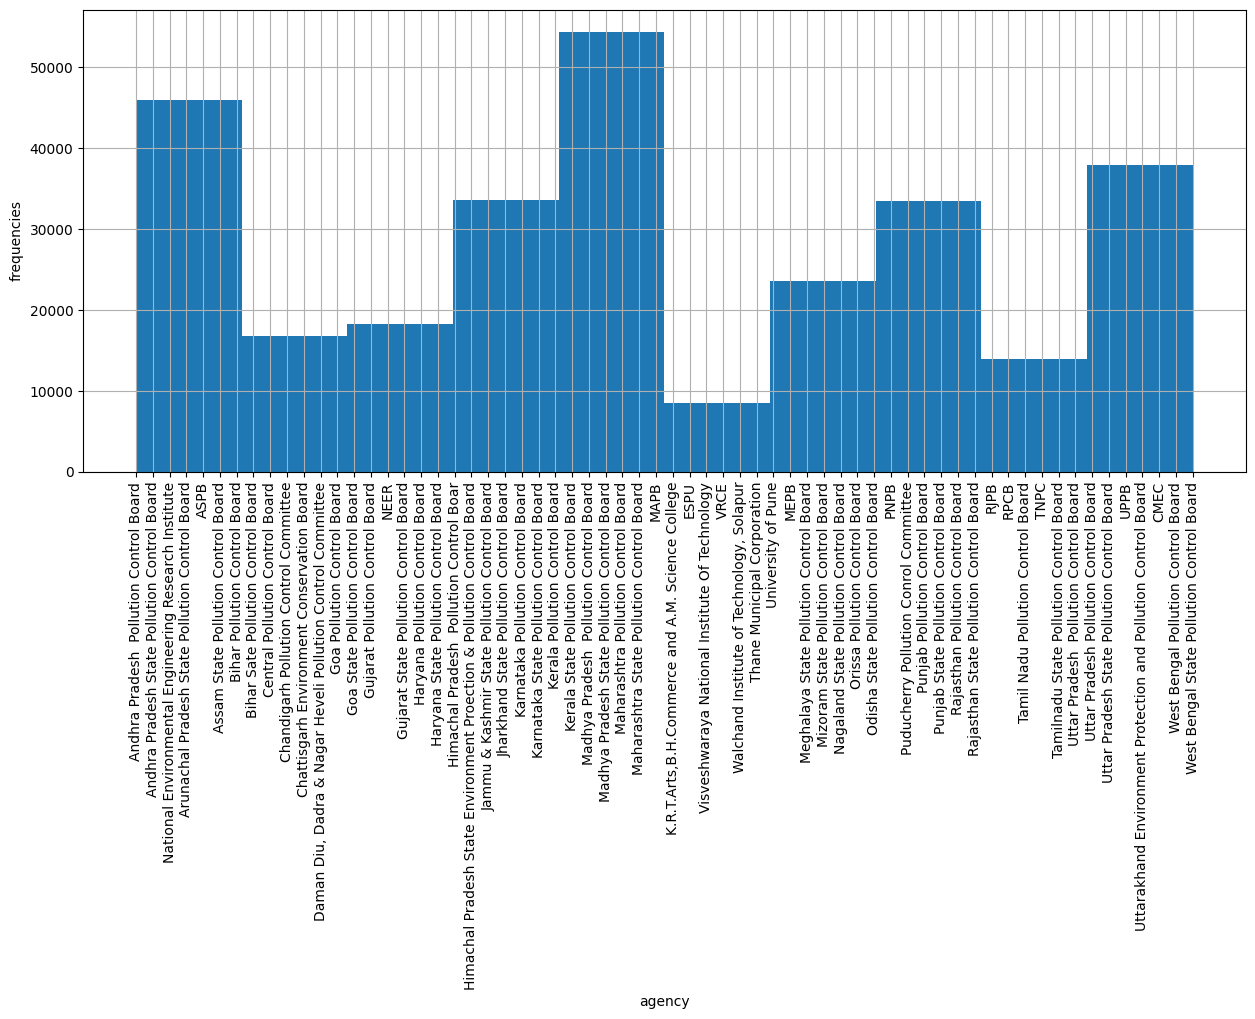

In [49]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('agency')
plt.ylabel('frequencies')
plt.plot

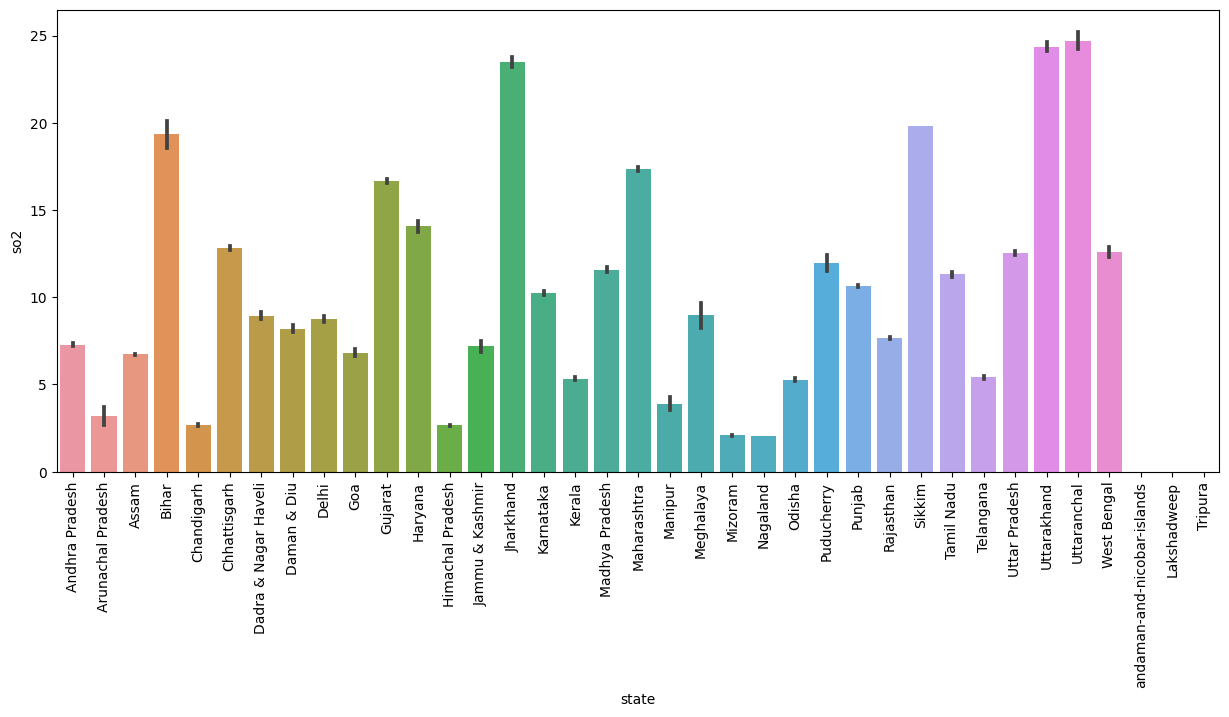

In [50]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(x='state', y='so2',data=df);

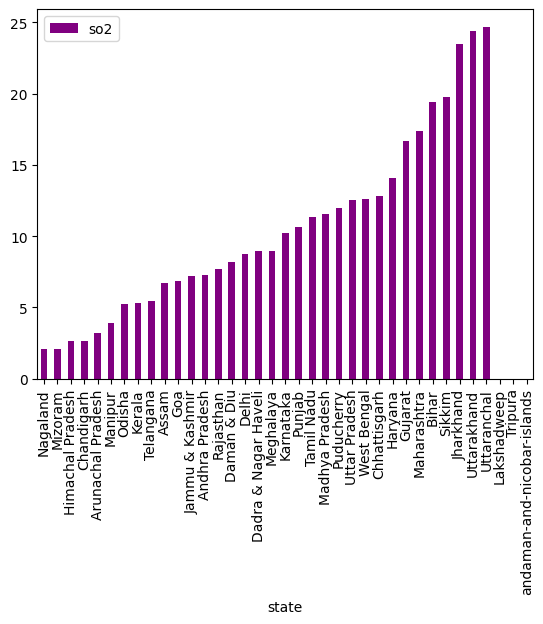

In [51]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by="so2").plot.bar(color='purple')
plt.show()

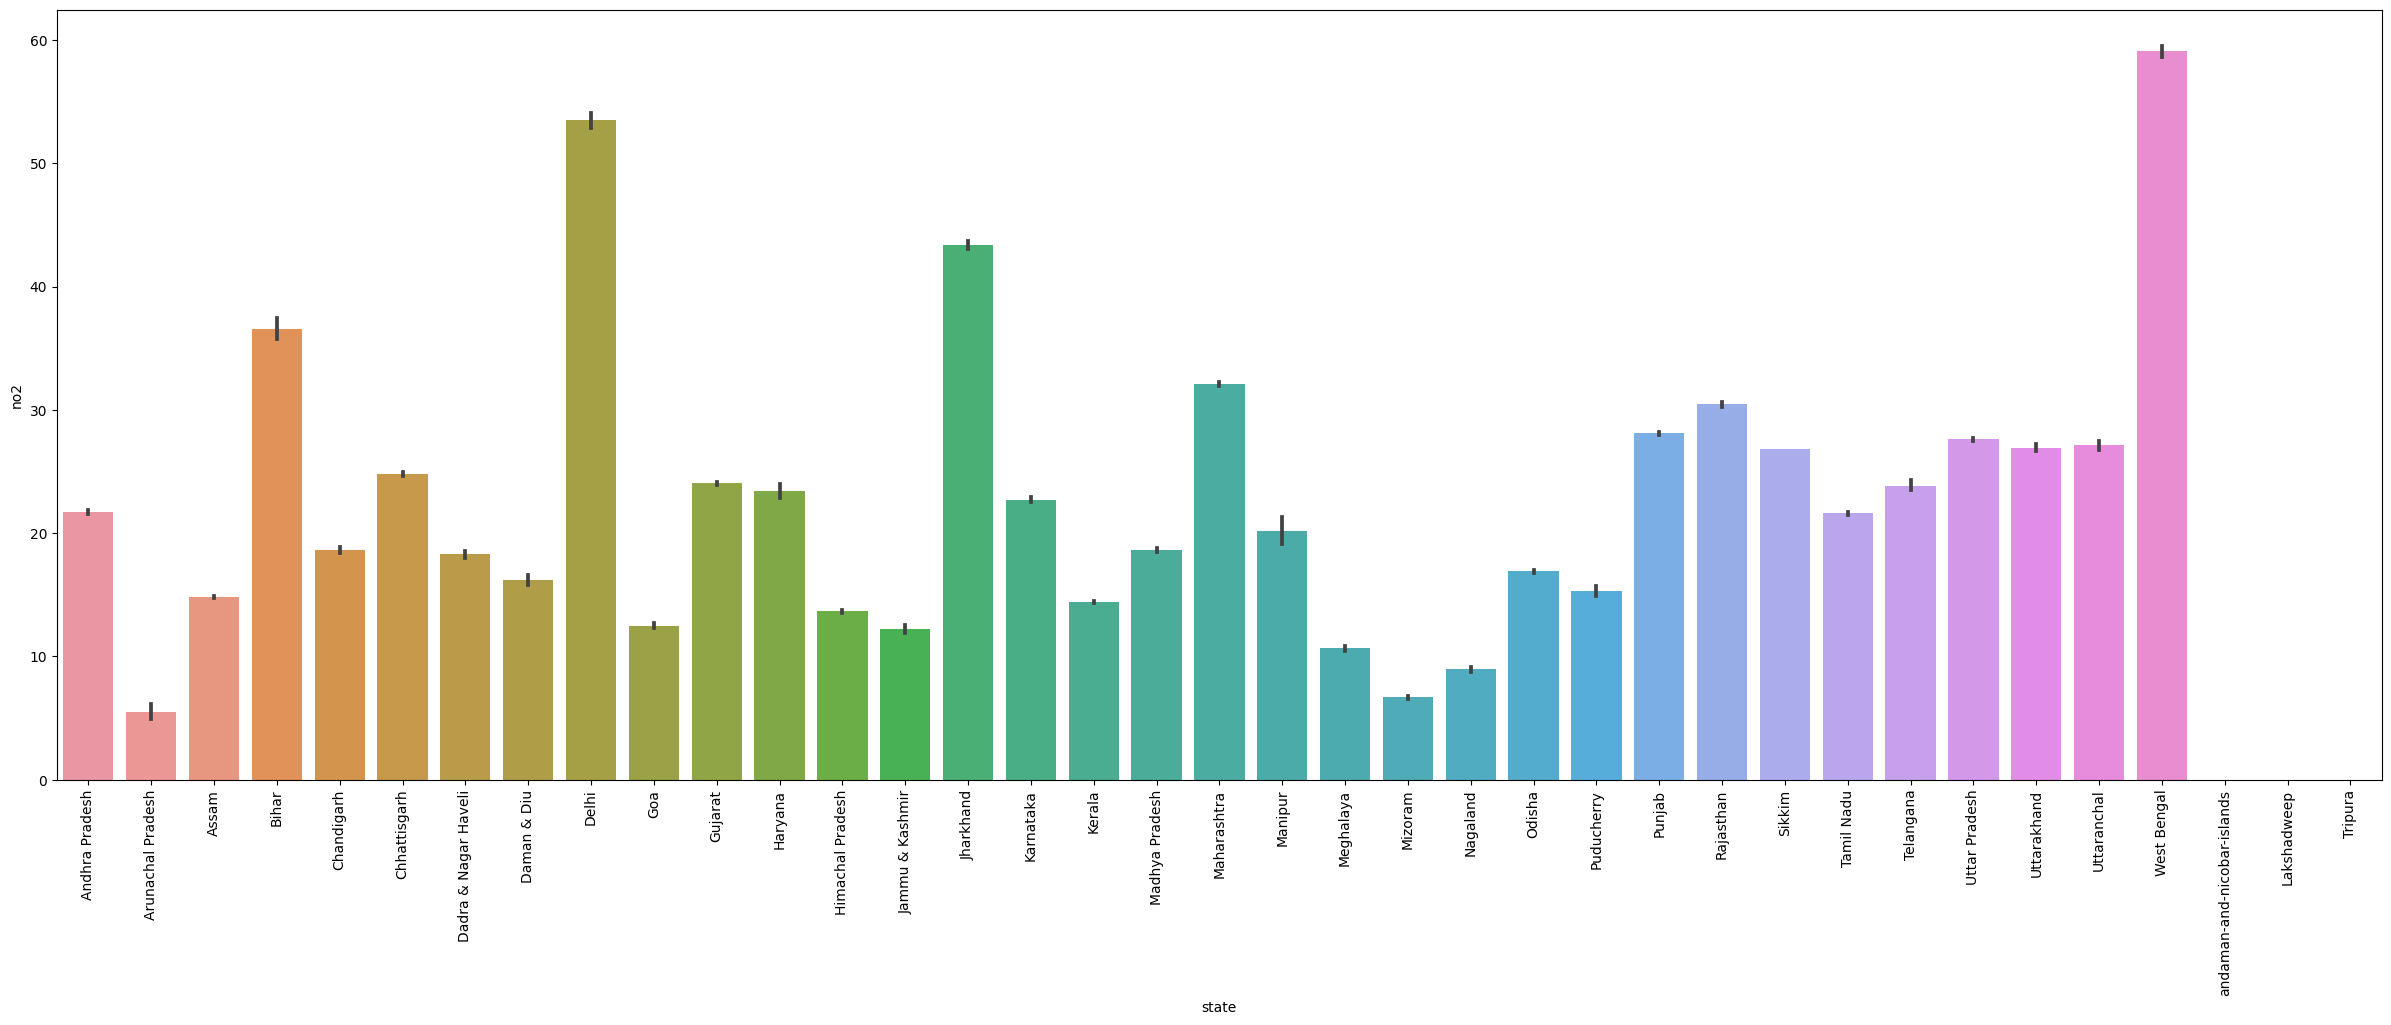

In [52]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='no2',data=df);

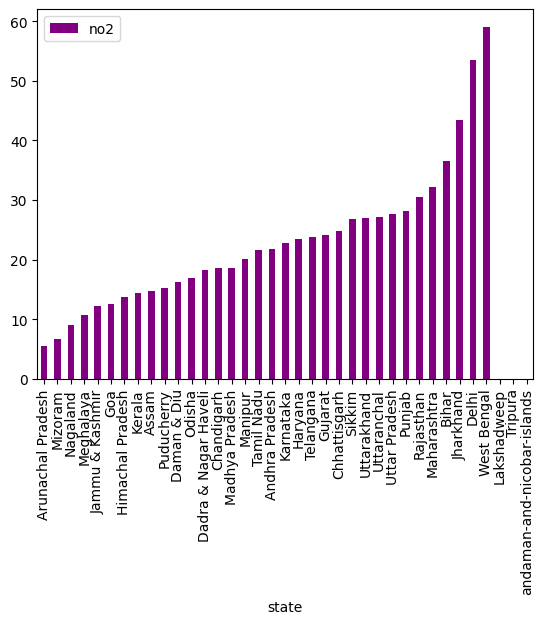

In [53]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by="no2").plot.bar(color='purple')
plt.show()

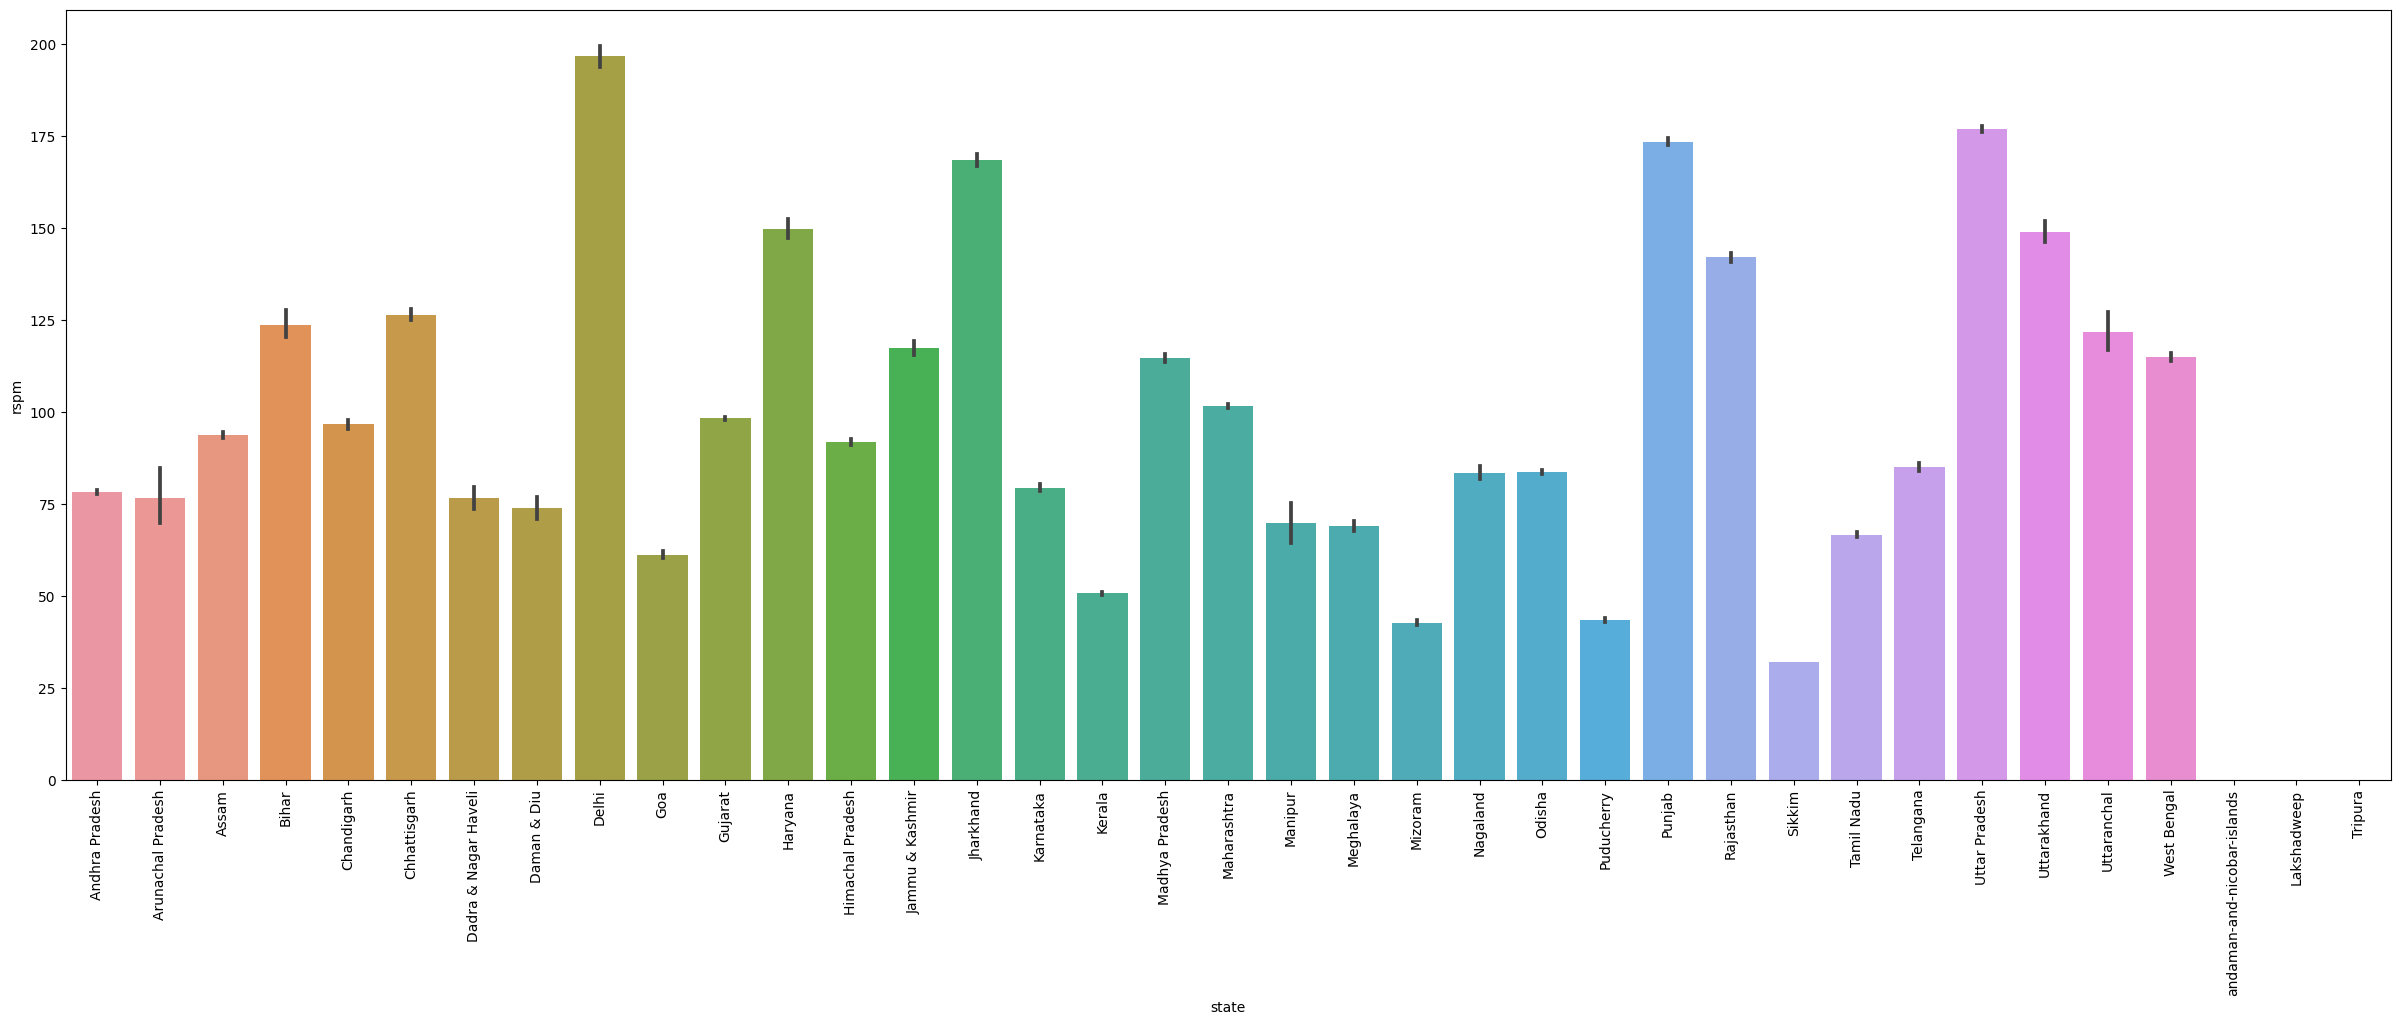

In [54]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='rspm',data=df);

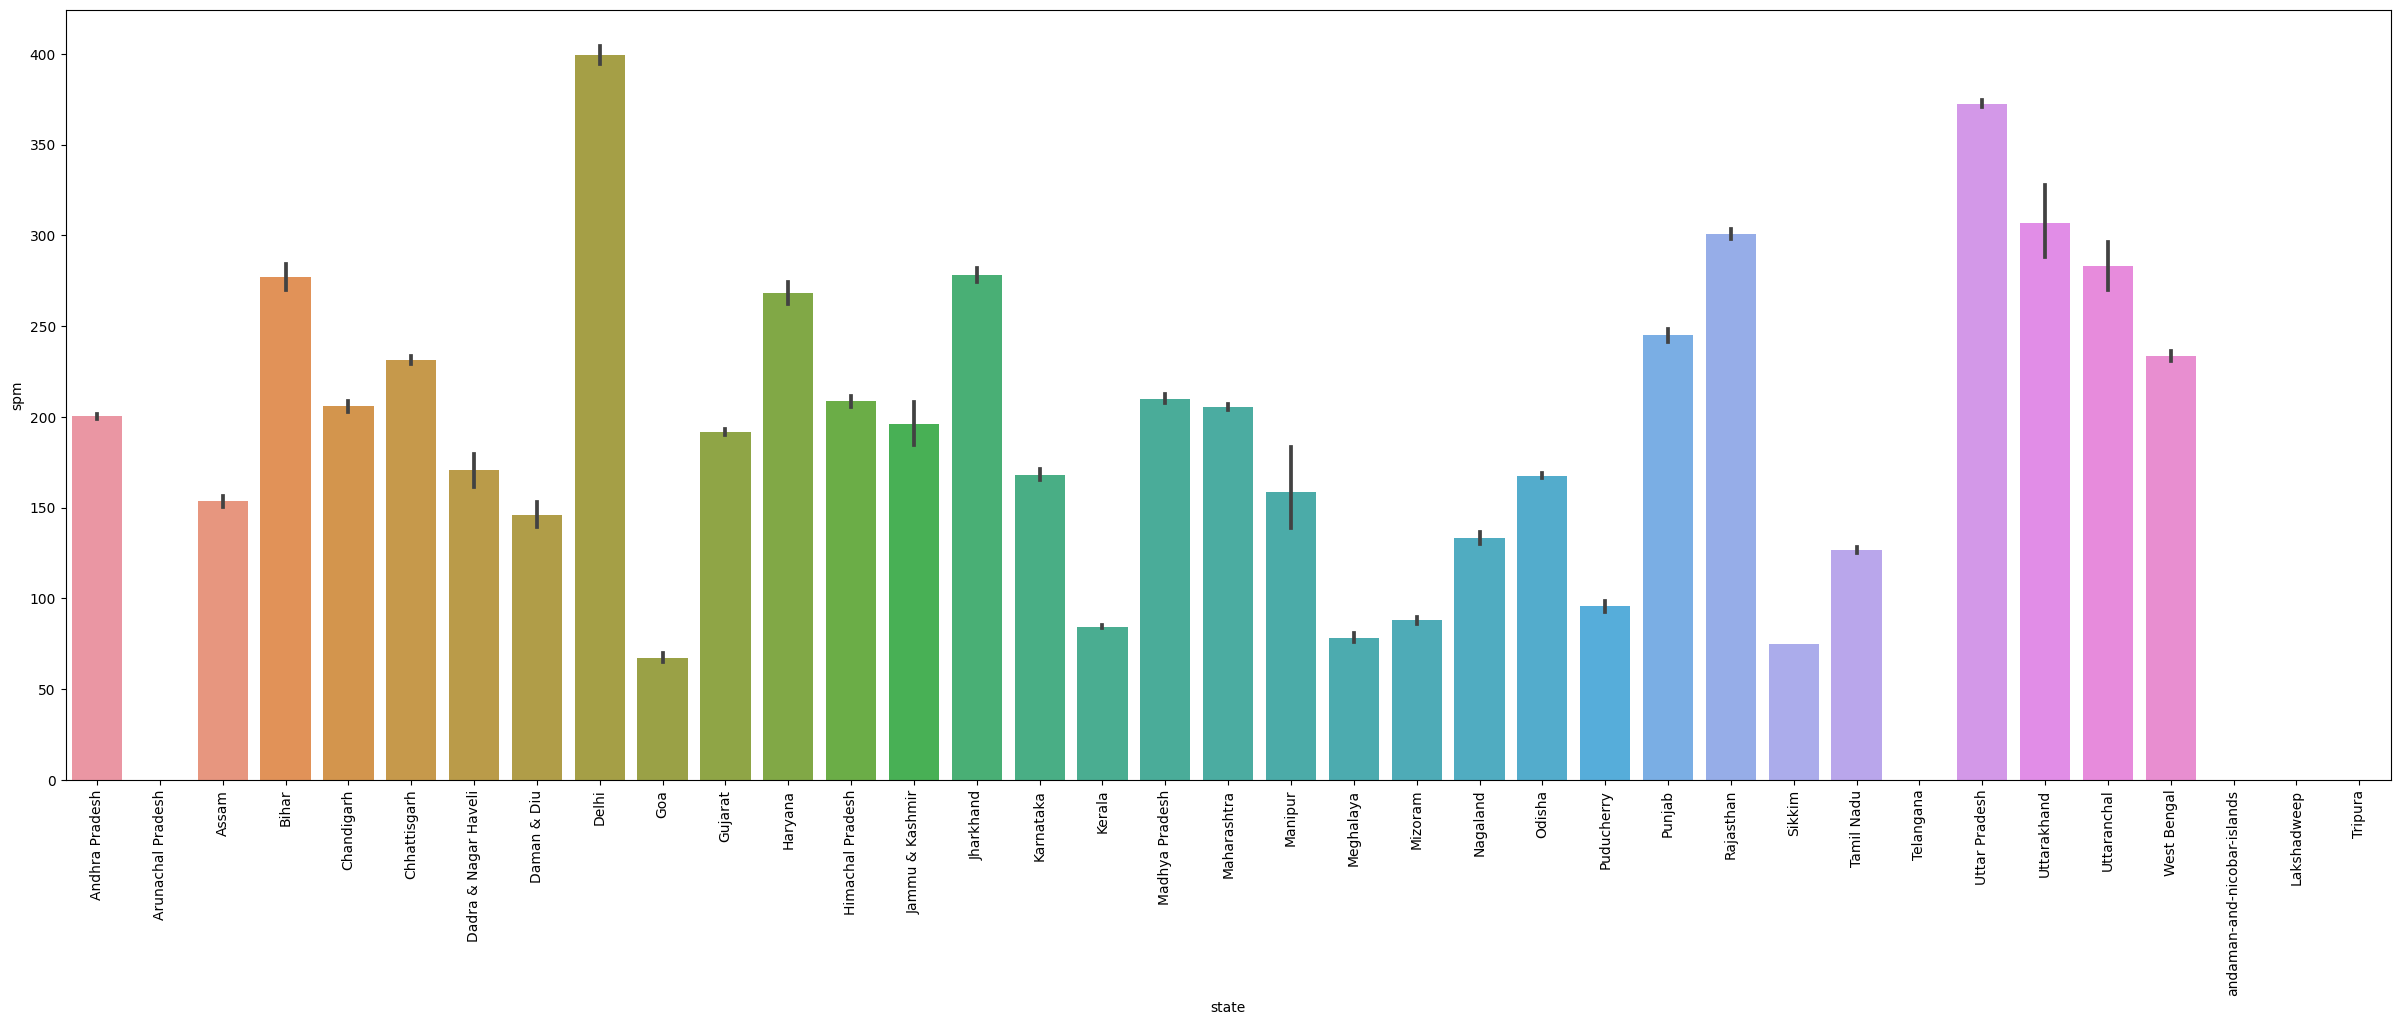

In [55]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='spm',data=df);

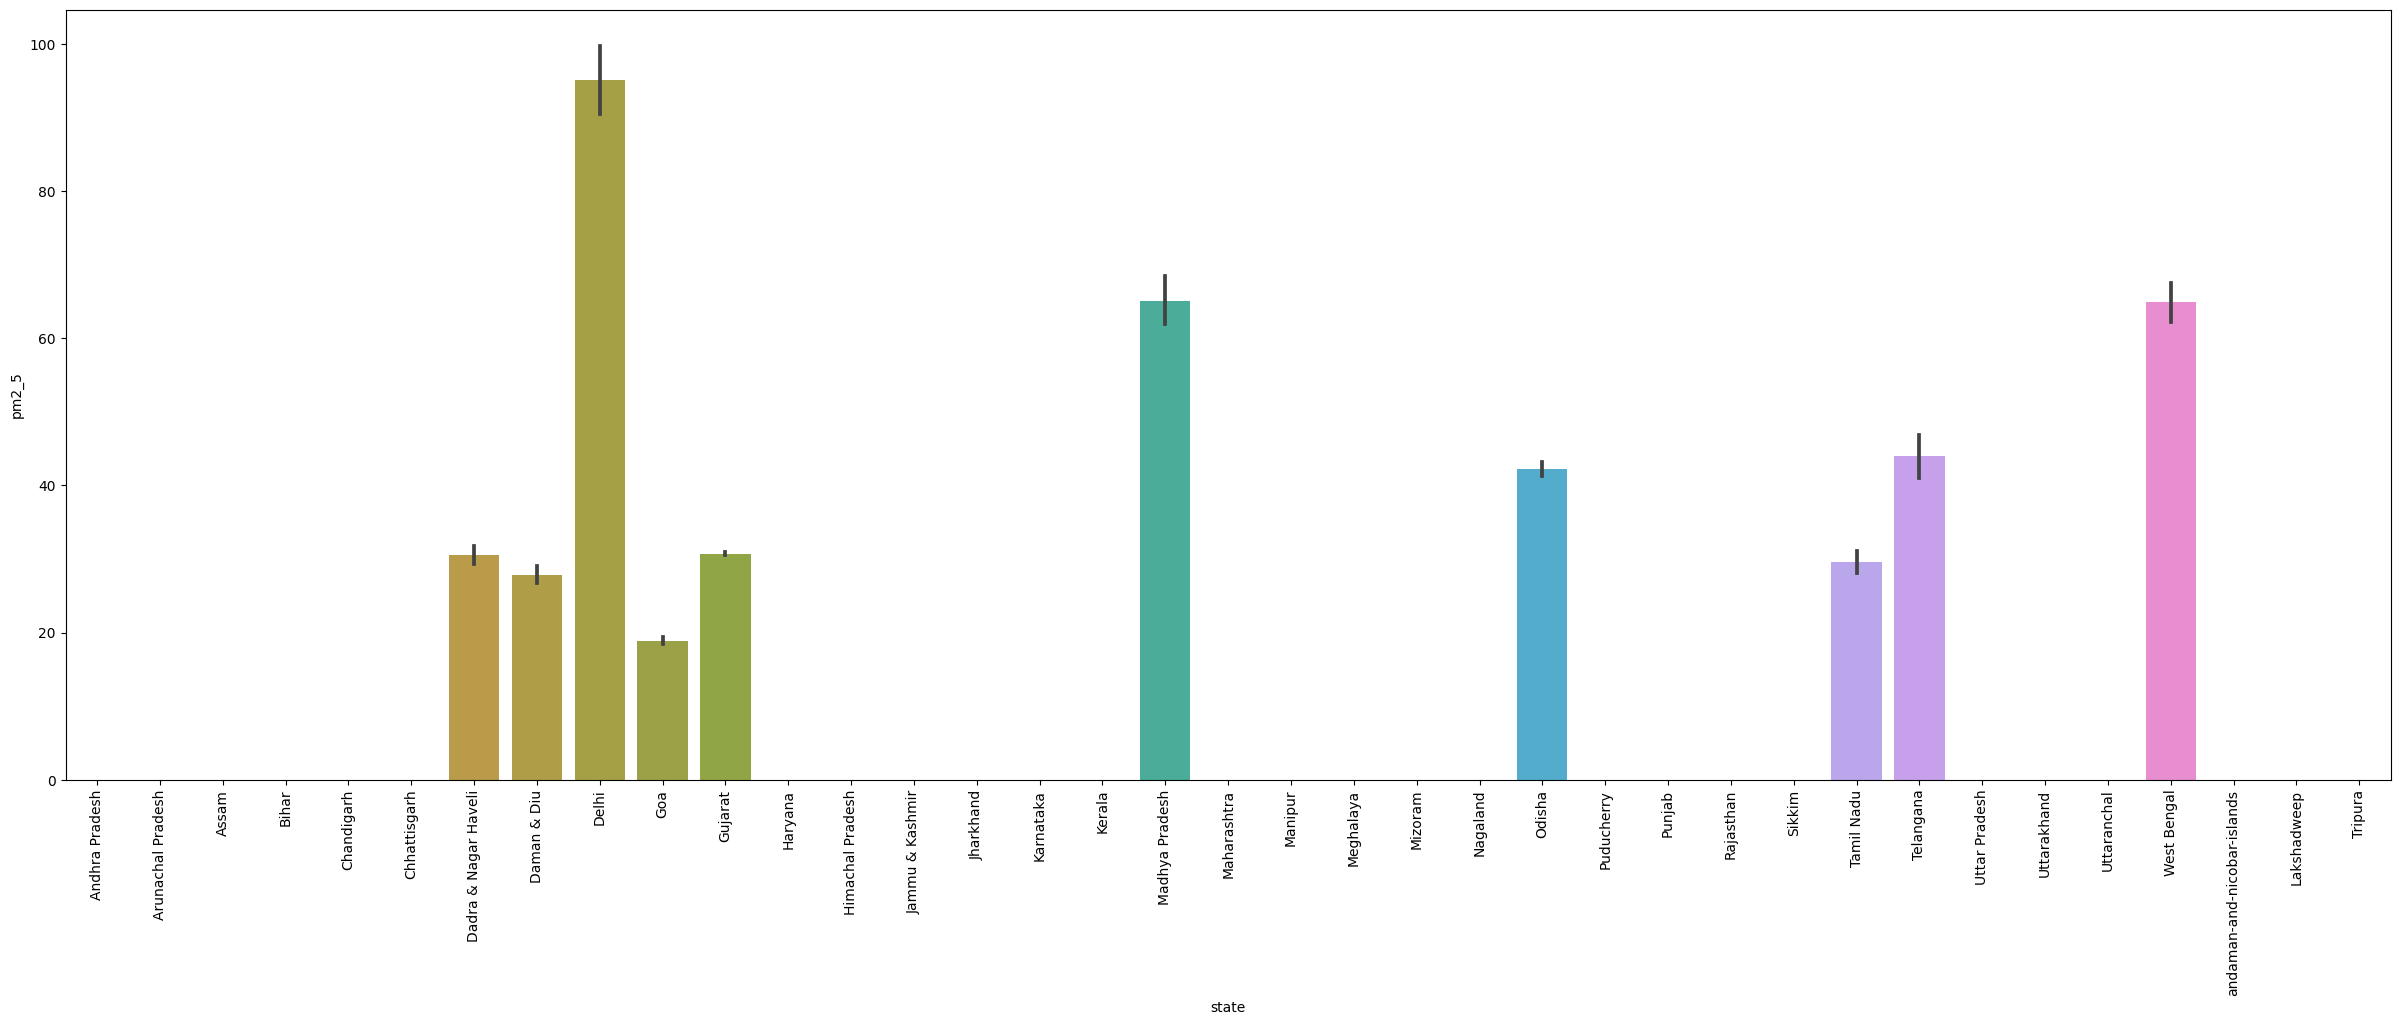

In [56]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='pm2_5',data=df);

In [57]:
nullvalues=df.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [58]:
null_values_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [59]:
missing_data_with_percentage=pd.concat([nullvalues,null_values_percentage],axis=1,keys=['Total','Percentage'])

In [60]:
missing_data_with_percentage

,Total,Percentage
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [61]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [62]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [63]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [65]:
df.fillna(0,inplace=True)

In [66]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [67]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


In [68]:
def cal_SOi(so2):
    si=0
    if(so2<=40):
        si=so2*(50/40)
    elif(so2>40 and so2<=80):
        si=50+(so2-40)*(50/40)
    elif(so2>80 and so2<=380):
        si=100+(so2-80)*(100/300)
    elif(so2>380 and so2<=800):
        si=200+(so2-380)*(100/420)
    elif(so2>800 and so2<=1600):
        si=300+(so2-800)*(100/800)
    elif(so2>1600):
        si=400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data=df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [69]:
def cal_NOi(no2):
    ni=0
    if(no2<=40):
        ni=no2*(50/40)
    elif(no2>40 and no2<=80):
        ni=50+(no2-40)*(50/40)
    elif(no2>80 and no2<=380):
        ni=100+(no2-80)*(100/300)
    elif(no2>380 and no2<=800):
        ni=200+(no2-380)*(100/420)
    elif(no2>800 and no2<=1600):
        ni=300+(no2-800)*(100/800)
    elif(no2>1600):
        ni=400+(no2-1600)*(100/800)
    return ni
df['NOi']=df['no2'].apply(cal_NOi)
data=df[['no2','NOi']]
data.head()

,no2,NOi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [71]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
        rpi=rpi*50/30    
    elif(rpi>30 and rpi<=60):
        rpi=50+(rpi-30)*(50/30)
    elif(rpi>60 and rpi<=90):
        rpi=100+(rpi-60)*(100/30)
    elif(rpi>90 and rpi<=120):
        rpi=200+(rpi-90)*(100/30)
    elif(rpi>120 and rpi<=250):
        rpi=300+(rpi-120)*(100/130)
    else:
        rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data=df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [72]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
        spi=spm*50/50   
    elif(spi>50 and spm<=100):
        spi=50+(spm-50)*(50/50)
    elif(spi>100 and spm<=250):
        spi=100+(spi-100)*(100/150)
    elif(spi>250 and spi<=350):
        spi=200+(spi-250)*(100/100)
    elif(spi>350 and spi<=430):
        spi=300+(spi-350)*(100/80)
    else:
        spi=400+(spi-430)*(100/430)
    return spi
df['SPMi']=df['spm'].apply(cal_SPMi)
data=df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [73]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and rspmi and si>spmi):
       aqi=si   
    if(ni>si and ni>rspmi and ni>spmi):
       aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
       aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
        aqi=spmi
    return aqi
df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['NOi'],x['Rpi'],x['SPMi']),axis=1)
data=df[['state','SOi','NOi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,NOi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [74]:
def AQI_Range(x):
    if x<=50:
        return "GOOD"
    elif x>50 and x<=100:
        return "moderate"
    elif x>100 and x<=200:
        return "poor"
    elif x>200 and x<=300:
        return "unhealthy"
    elif x>300 and x<=400:
        return "very unhealthy"
    elif x>400:
        return "hazaraduous"
df['AQI_Range']=df['AQI'].apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,NOi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,GOOD
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,GOOD
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,GOOD
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,GOOD
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,GOOD


In [75]:
df['AQI_Range'].value_counts()

AQI_Range
GOOD              221083
unhealthy         185932
moderate           25509
poor                3217
very unhealthy         1
Name: count, dtype: int64

In [76]:
X=df[['SOi','NOi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,NOi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [77]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(348593, 4) (87149, 4) (348593,) (87149,)


In [79]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [80]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [81]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData =",str(RMSE_train))
print("RMSE TestingData =",str(RMSE_test))
print('-'*50)
print("R squared value on train",model.score(X_train,Y_train))
print("R squared value on test",model.score(X_test,Y_test))

RMSE TrainingData = 11.406078293058385
RMSE TestingData = 11.407660602845553
--------------------------------------------------
R squared value on train 0.9928653955718985
R squared value on test 0.992857924452794


In [82]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train9)

DecisionTreeRegressor()

In [83]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [84]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData =",str(RMSE_train))
print("RMSE TestingData =",str(RMSE_test))
print('-'*50)
print("R squared value on train",DT.score(X_train,Y_train))
print("R squared value on test",DT.score(X_test,Y_test))

RMSE TrainingData = 3.178784602669672e-15
RMSE TestingData = 1.0993334103334247
--------------------------------------------------
R squared value on train 1.0
R squared value on test 0.9999336730372734


In [85]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)


RandomForestRegressor()

In [86]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [87]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData =",str(RMSE_train))
print("RMSE TestingData =",str(RMSE_test))
print('-'*50)
print("R squared value on train",RF.score(X_train,Y_train))
print("R squared value on test",RF.score(X_test,Y_test))

RMSE TrainingData = 0.29217067594124563
RMSE TestingData = 0.8528445384818081
--------------------------------------------------
R squared value on train 0.9999953186571063
R squared value on test 0.9999600817952354


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [89]:
X2=df[['SOi','NOi','Rpi','SPMi']]
Y2=df[['AQI_Range']]

In [90]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X2,Y2,test_size=0.33,random_state=70)

In [91]:
log_reg=LogisticRegression().fit(X_train2,Y_train2)
train_preds2=log_reg.predict(X_train2)
print("model accuracy on train is",accuracy_score(Y_train2,train_preds2))
test_preds2=log_reg.predict(X_test2)
print("model accuracy on test is",accuracy_score(Y_test2,test_preds2))
print("kappa score is",metrics.cohen_kappa_score(Y_test2,test_preds2))

model accuracy on train is 0.9885390156432503
model accuracy on test is 0.9885879203032094
kappa score is 0.979453166791119


In [92]:
log_reg.predict([[727,327.55,78.2,100]])

array(['unhealthy'], dtype=object)

In [93]:
log_reg.predict([[2.7,45,35.16,23]])

array(['GOOD'], dtype=object)

In [94]:
log_reg.predict([[2,45.8,37,32]])

array(['GOOD'], dtype=object)

In [95]:
DT2=DecisionTreeClassifier().fit(X_train2,Y_train2)
train_preds3=DT2.predict(X_train2)
print("model accuracy on train is",accuracy_score(Y_train2,train_preds3))
test_preds3=DT2.predict(X_test2)
print("model accuracy on test is",accuracy_score(Y_test2,test_preds3))
print("kappa score is",metrics.cohen_kappa_score(Y_test2,test_preds3))

model accuracy on train is 1.0
model accuracy on test is 0.9998678674501895
kappa score is 0.9997627083241495


In [96]:
RF=RandomForestClassifier().fit(X_train2,Y_train2)
train_preds4=RF.predict(X_train2)
print("model accuracy on train is",accuracy_score(Y_train2,train_preds4))
test_preds4=RF.predict(X_test2)
print("model accuracy on test is",accuracy_score(Y_test2,test_preds4))
print("kappa score is",metrics.cohen_kappa_score(Y_test2,test_preds4))

model accuracy on train is 1.0
model accuracy on test is 0.9998678674501895
kappa score is 0.9997627142564892


In [97]:
KNN=KNeighborsClassifier().fit(X_train2,Y_train2)
train_preds5=KNN.predict(X_train2)
print("model accuracy on train is",accuracy_score(Y_train2,train_preds5))
test_preds5=KNN.predict(X_test2)
print("model accuracy on test is",accuracy_score(Y_test2,test_preds5))
print("kappa score is",metrics.cohen_kappa_score(Y_test2,test_preds5))

model accuracy on train is 0.999626644562198
model accuracy on test is 0.999367154629855
kappa score is 0.99886339868255


In [98]:
KNN.predict([[7.4,47.7,78.182,100]])

array(['GOOD'], dtype=object)

In [99]:
KNN.predict([[1,1.2,3.12,0]])

array(['GOOD'], dtype=object)

In [100]:
KNN.predict([[325.7,345,798.182,203]])

array(['unhealthy'], dtype=object)

In [101]:
KNN.predict([[1,2,3,4]])

array(['GOOD'], dtype=object)

In [1]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=[[-1,2016],[-1,2017],[-1,2018],[-1,2019],[-1,2020]]

In [3]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(data)
x=scaler.transform(data)

In [4]:
newB=[103.59,-2.74]
ypred=-(x.dot(newB))

In [5]:
print("AQI for the year 2020===>",ypred[-1])

AQI for the year 2020===> 106.33
